# Transactions Fraud Detection

**Authors:** [Peter Macinec](https://github.com/pmacinec), [Timotej Zatko](https://github.com/timzatko)

## Baseline model and feature selection

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier

from src.dataset import load_processed_data
from src.evaluation import custom_classification_report

### All features

In [4]:
x_train, y_train, x_test, y_test = load_processed_data()

Number of records:
  x_train - 472432
  y_train - 472432
  x_test - 118108
  y_test - 118108


In [5]:
%%time

clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(x_train, y_train)

CPU times: user 1min 23s, sys: 3.69 s, total: 1min 27s
Wall time: 1min 27s


not fraud
precision: 0.9813025837387807
recall: 0.9838515113893511
f1-score: 0.9825753945048519
support: 113571


is fraud
precision: 0.5676567656765676
recall: 0.5307471897729777
f1-score: 0.5485818430345141
support: 4537


accuracy: 0.9664459647102652


macro avg
precision: 0.7744796747076741
recall: 0.7572993505811645
f1-score: 0.7655786187696829
support: 118108


weighted avg
precision: 0.9654127957773533
recall: 0.9664459647102652
f1-score: 0.9659039688349488
support: 118108


Area Under the Receiver Operating Characteristic Curve (ROC AUC)
micro: 0.7744796747076742
macro: 0.7744796747076742
samples: 0.7744796747076742
weighted: 0.7744796747076742


CPU times: user 891 ms, sys: 90.1 ms, total: 981 ms
Wall time: 997 ms


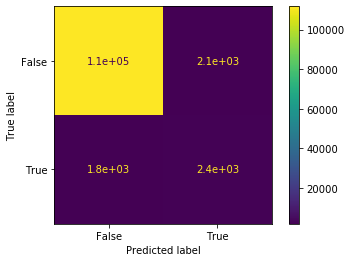

In [6]:
%%time

custom_classification_report(clf, x_test, y_test)